<a href="https://colab.research.google.com/github/othniel77/datascience/blob/main/Sampling_methods_et_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving coffee_ratings_full.feather to coffee_ratings_full.feather


In [ ]:
 attrition_pop = pd.read_feather('/content/attrition (1).feather')
 print(attrition_pop.describe)

<bound method NDFrame.describe of       Age  Attrition     BusinessTravel  DailyRate            Department  \
0      21        0.0      Travel_Rarely        391  Research_Development   
1      19        1.0      Travel_Rarely        528                 Sales   
2      18        1.0      Travel_Rarely        230  Research_Development   
3      18        0.0      Travel_Rarely        812                 Sales   
4      18        1.0  Travel_Frequently       1306                 Sales   
...   ...        ...                ...        ...                   ...   
1465   55        0.0      Travel_Rarely       1117                 Sales   
1466   58        0.0         Non-Travel        350                 Sales   
1467   58        0.0      Travel_Rarely        682                 Sales   
1468   58        1.0      Travel_Rarely        147  Research_Development   
1469   58        1.0      Travel_Rarely        286  Research_Development   

      DistanceFromHome      Education EducationField 

In [ ]:
# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(n=70,random_state=18900217)

# Print the sample
print(attrition_samp)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1134   35        0.0      Travel_Rarely        583  Research_Development   
1150   52        0.0         Non-Travel        585                 Sales   
531    33        0.0      Travel_Rarely        931  Research_Development   
395    31        0.0      Travel_Rarely       1332  Research_Development   
392    29        0.0      Travel_Rarely        942  Research_Development   
...   ...        ...                ...        ...                   ...   
361    27        0.0  Travel_Frequently       1410                 Sales   
1180   36        0.0      Travel_Rarely        530                 Sales   
230    26        0.0      Travel_Rarely       1443                 Sales   
211    29        0.0  Travel_Frequently        410  Research_Development   
890    30        0.0  Travel_Frequently       1312  Research_Development   

      DistanceFromHome      Education    EducationField  \
1134                25      

 the indexes in the sample aren't always in increasing order. They are just random.

In [ ]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size // sample_size

# Systematically sample 70 rows
attrition_sys_samp = attrition_pop.iloc[::interval]

# Print the sample
print(attrition_sys_samp)

      Age  Attrition BusinessTravel  DailyRate            Department  \
0      21        0.0  Travel_Rarely        391  Research_Development   
21     19        0.0  Travel_Rarely       1181  Research_Development   
42     45        0.0  Travel_Rarely        252  Research_Development   
63     23        0.0  Travel_Rarely        373  Research_Development   
84     30        1.0  Travel_Rarely        945                 Sales   
...   ...        ...            ...        ...                   ...   
1365   48        0.0  Travel_Rarely        715  Research_Development   
1386   48        0.0  Travel_Rarely       1355  Research_Development   
1407   50        0.0  Travel_Rarely        989  Research_Development   
1428   50        0.0     Non-Travel        881  Research_Development   
1449   52        0.0  Travel_Rarely        699  Research_Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                   15        College  Life_Sciences   

Systematic sampling avoids randomness by picking rows at regular intervals.

In [ ]:
import matplotlib.pyplot as plt

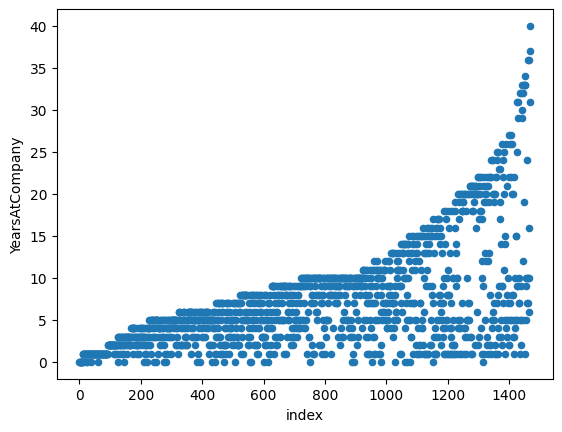

In [ ]:
# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(x="index",y="YearsAtCompany",kind="scatter")
plt.show()

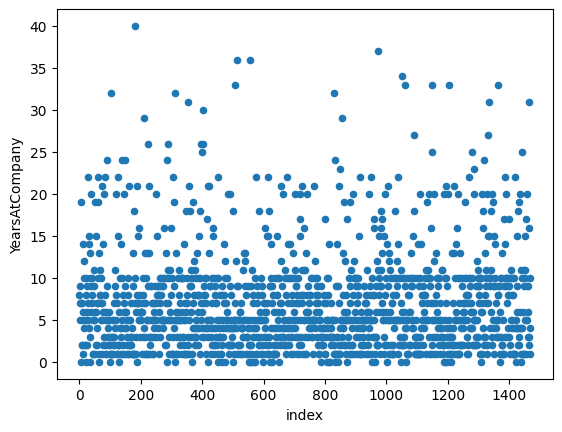

In [ ]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)

# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(x="index",y="YearsAtCompany",kind="scatter")
plt.show()

sampling has problems when the data are sorted or contain a pattern. Shuffling the rows makes it equivalent to simple random sampling.

In [ ]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop["Education"].value_counts(normalize=True)

# Print education_counts_pop
print(education_counts_pop)

Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: Education, dtype: float64


In [ ]:
# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby("Education").sample(frac=0.4,random_state=2022)


# Print the sample
print(attrition_strat)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1191   53        0.0      Travel_Rarely        238                 Sales   
407    29        0.0  Travel_Frequently        995  Research_Development   
1233   59        0.0  Travel_Frequently       1225                 Sales   
366    37        0.0      Travel_Rarely        571  Research_Development   
702    31        0.0  Travel_Frequently        163  Research_Development   
...   ...        ...                ...        ...                   ...   
733    38        0.0  Travel_Frequently        653  Research_Development   
1061   44        0.0  Travel_Frequently        602       Human_Resources   
1307   41        0.0      Travel_Rarely       1276                 Sales   
1060   33        0.0      Travel_Rarely        516  Research_Development   
177    29        0.0      Travel_Rarely        738  Research_Development   

      DistanceFromHome      Education    EducationField  \
1191                 1  Belo

In [ ]:
# Calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat['Education'].value_counts(normalize=True)

# Print education_counts_strat
print(education_counts_strat)

Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: Education, dtype: float64


the size of each group in the sample is representative of the size of the sample in the population.

In [ ]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby("Education").sample(n=30,random_state=2022)


# Print the sample
print(attrition_eq)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1191   53        0.0      Travel_Rarely        238                 Sales   
407    29        0.0  Travel_Frequently        995  Research_Development   
1233   59        0.0  Travel_Frequently       1225                 Sales   
366    37        0.0      Travel_Rarely        571  Research_Development   
702    31        0.0  Travel_Frequently        163  Research_Development   
...   ...        ...                ...        ...                   ...   
774    33        0.0      Travel_Rarely        922  Research_Development   
869    45        0.0      Travel_Rarely       1015  Research_Development   
530    32        0.0      Travel_Rarely        120  Research_Development   
1049   48        0.0      Travel_Rarely        163                 Sales   
350    29        1.0      Travel_Rarely        408  Research_Development   

      DistanceFromHome      Education    EducationField  \
1191                 1  Belo

In [ ]:
# Get the proportions from attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize=True)

# Print the results
print(education_counts_eq)

Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: Education, dtype: float64


you want each subgroup to have equal weight in your analysis, then equal counts stratified sampling is the appropriate technique.

In [ ]:
import numpy as np

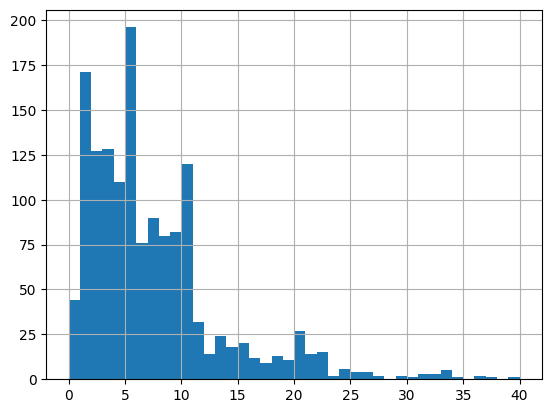

In [ ]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop["YearsAtCompany"].hist(bins=np.arange(0,41,1))
plt.show()

In [ ]:
# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400,weights="YearsAtCompany")
# Print the sample
print(attrition_weight)

      Age  Attrition BusinessTravel  DailyRate            Department  \
1251   44        0.0  Travel_Rarely        200  Research_Development   
182    31        0.0  Travel_Rarely        329  Research_Development   
1469   58        1.0  Travel_Rarely        286  Research_Development   
860    37        0.0  Travel_Rarely        674  Research_Development   
1030   59        0.0  Travel_Rarely        326                 Sales   
...   ...        ...            ...        ...                   ...   
1372   53        0.0  Travel_Rarely       1282  Research_Development   
346    34        0.0     Non-Travel       1381                 Sales   
1104   38        0.0  Travel_Rarely        833  Research_Development   
419    31        0.0  Travel_Rarely       1003                 Sales   
282    25        0.0  Travel_Rarely       1356                 Sales   

      DistanceFromHome Education    EducationField EnvironmentSatisfaction  \
1251                29    Master             Other       

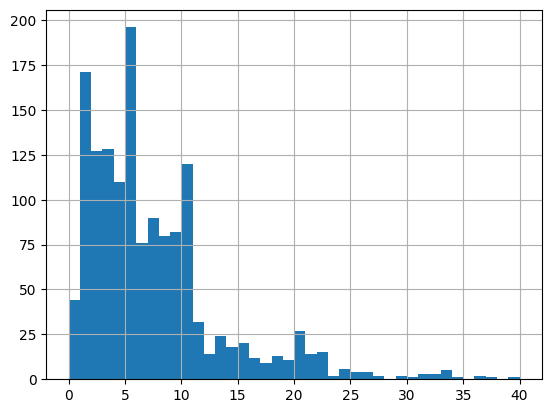

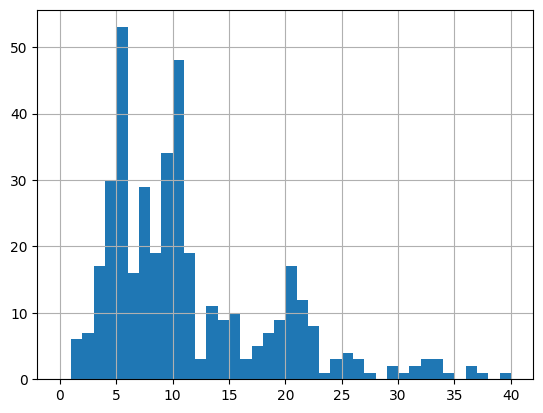

In [ ]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")

# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight["YearsAtCompany"].hist(bins=np.arange(0,41,1))
plt.show()

The fact that the two numbers are different means that the weighted simple random sample is biased.

# **Cluster sampling**

In [ ]:
import random

In [ ]:
# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())

# Randomly sample four JobRole values
job_roles_samp =random.sample(job_roles_pop,k=4)

# Print the result
print(job_roles_samp)

['Research_Scientist', 'Healthcare_Representative', 'Research_Director', 'Sales_Executive']


In [ ]:
# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)

# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]

# Print the result
print(attrition_filtered)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1      19        1.0      Travel_Rarely        528                 Sales   
3      18        0.0      Travel_Rarely        812                 Sales   
4      18        1.0  Travel_Frequently       1306                 Sales   
9      18        1.0  Travel_Frequently        544                 Sales   
23     19        1.0  Travel_Frequently        602                 Sales   
...   ...        ...                ...        ...                   ...   
1462   54        0.0      Travel_Rarely        584  Research_Development   
1464   55        0.0      Travel_Rarely        452  Research_Development   
1465   55        0.0      Travel_Rarely       1117                 Sales   
1466   58        0.0         Non-Travel        350                 Sales   
1469   58        1.0      Travel_Rarely        286  Research_Development   

      DistanceFromHome      Education    EducationField  \
1                   22  Belo

In [ ]:
# Remove categories with no rows
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby("JobRole").sample(n=10,random_state=2022)


# Print the sample
print(attrition_clust)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1348   44        1.0      Travel_Rarely       1376       Human_Resources   
886    41        0.0         Non-Travel        552       Human_Resources   
983    39        0.0      Travel_Rarely        141       Human_Resources   
88     27        1.0  Travel_Frequently       1337       Human_Resources   
189    34        0.0      Travel_Rarely        829       Human_Resources   
160    24        0.0  Travel_Frequently        897       Human_Resources   
839    46        0.0      Travel_Rarely        991       Human_Resources   
966    30        0.0      Travel_Rarely       1240       Human_Resources   
162    28        0.0         Non-Travel        280       Human_Resources   
1231   37        0.0      Travel_Rarely       1239       Human_Resources   
1375   44        0.0      Travel_Rarely       1315  Research_Development   
1462   54        0.0      Travel_Rarely        584  Research_Development   
1316   45   

<ipython-input-48-67afa2d2f050>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()


The two-stage sampling technique gives you control over sampling both between subgroups and within subgroups.

In [ ]:
# Perform simple random sampling to get 0.25 of the population
attrition_srs = attrition_pop.sample(frac=0.25,random_state=2022)

In [ ]:
# Perform stratified sampling to get 0.25 of each relationship group
attrition_strat =attrition_pop.groupby("RelationshipSatisfaction").sample(frac=0.25,random_state=2022)

In [ ]:
# Create a list of unique RelationshipSatisfaction values
satisfaction_unique = list(attrition_pop["RelationshipSatisfaction"].unique())

# Randomly sample 2 unique satisfaction values
satisfaction_samp = random.sample(satisfaction_unique,k=2)

# Filter for satisfaction_samp and clear unused categories from RelationshipSatisfaction
satis_condition = attrition_pop["RelationshipSatisfaction"].isin(satisfaction_samp)
attrition_clust_prep = attrition_pop[satis_condition]
attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()

# Perform cluster sampling on the selected group, getting 0.25 of attrition_pop
attrition_clust = attrition_clust_prep.groupby("RelationshipSatisfaction").sample(n=len(attrition_pop)//4,random_state=2022)


<ipython-input-51-e0457cc3c110>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()


Now we have the three samples set up, let's calculate some summary statistics.

In [ ]:
# Mean Attrition by RelationshipSatisfaction group
mean_attrition_pop = attrition_pop.groupby("RelationshipSatisfaction")["Attrition"].mean()

# Print the result
print(mean_attrition_pop)

RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64


In [ ]:
# Calculate the same thing for the simple random sample
mean_attrition_srs = attrition_srs.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_srs)

RelationshipSatisfaction
Low          0.134328
Medium       0.164179
High         0.160000
Very_High    0.155963
Name: Attrition, dtype: float64


In [ ]:
# Calculate the same thing for the stratified sample
mean_attrition_strat = attrition_strat.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_strat)

RelationshipSatisfaction
Low          0.144928
Medium       0.078947
High         0.165217
Very_High    0.129630
Name: Attrition, dtype: float64


In [ ]:
# Calculate the same thing for the cluster sample
mean_attrition_clust =attrition_clust.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_clust)

RelationshipSatisfaction
High         0.149864
Very_High    0.160763
Name: Attrition, dtype: float64


The numbers are all fairly similar, with the notable exception that cluster sampling only gives results for the clusters included in the sample

# **Chap 3 : sampling distribution**

In [ ]:


# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition_pop.sample(n=50,random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct50 =100*abs(mean_attrition_pop-mean_attrition_srs50)/mean_attrition_pop

# Print rel_error_pct50
print(rel_error_pct50)

RelationshipSatisfaction
Low          70.947368
Medium       59.600000
High         61.211268
Very_High    59.500000
Name: Attrition, dtype: float64


In [ ]:
# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n=100,random_state=2022)


# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct100 = 100*abs(mean_attrition_pop-mean_attrition_srs100)/mean_attrition_pop

# Print rel_error_pct100
print(rel_error_pct100)


RelationshipSatisfaction
Low          27.368421
Medium        1.000000
High          3.028169
Very_High     1.250000
Name: Attrition, dtype: float64


you increase the sample size, the sample mean generally gets closer to the population mean, and the relative error decreases.

In [ ]:
# Create an empty list
mean_attritions = []
# Loop 500 times to create 500 sample means
for i in range(500):
	mean_attritions.append(
    	attrition_pop.sample(n=60)['Attrition'].mean()
	)

# Print out the first few entries of the list
print(mean_attritions[0:5])

[0.2, 0.13333333333333333, 0.2, 0.15, 0.2]


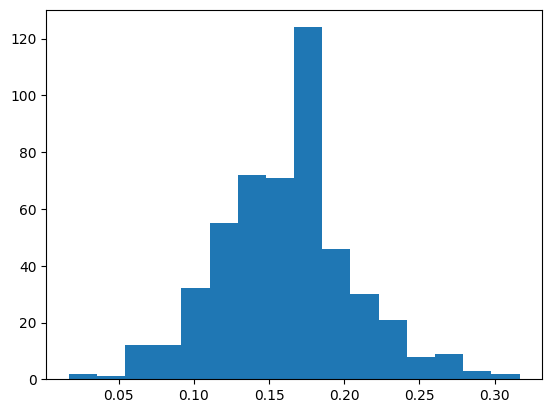

In [ ]:
# Create an empty list
mean_attritions = []
# Loop 500 times to create 500 sample means
for i in range(500):
	mean_attritions.append(
    	attrition_pop.sample(n=60)['Attrition'].mean()
	)

# Create a histogram of the 500 sample means
plt.hist(mean_attritions,bins=16)
plt.show()

the sample statistic many times with different samples, you can quantify the amount of variation in those statistics.

In [ ]:
import numpy as np

In [ ]:
# Sample one to eight, five times, with replacement
five_rolls = np.random.choice(list(range(1,9)),size=5, replace=True)

# Print the mean of five_rolls
print(five_rolls.mean())

2.2


In [ ]:
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
  		np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )

# Print the first 10 entries of the result
print(sample_means_1000[0:10])

[5.6, 4.4, 3.0, 5.2, 4.0, 4.4, 6.2, 4.8, 6.6, 4.2]


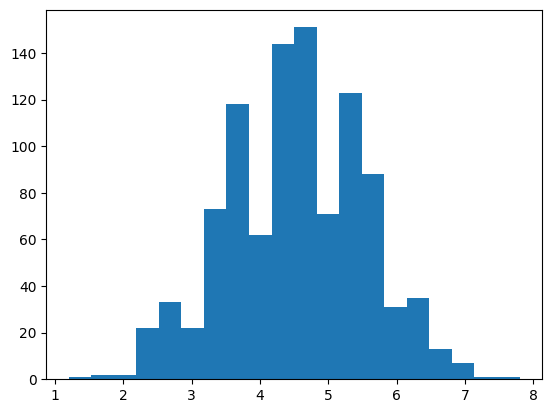

In [ ]:
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
  		np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )

# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000,bins=20)
plt.show()

Once your dataset gets sufficiently big, exact sampling distributions cannot be calculated, so an approximate sampling distribution must be used